In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

import json

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
raw_df = pd.read_csv("/content/student_provided.csv", index_col="RegionName")
raw_df.head()

,RegionID,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
RegionName,,,,,,,,,,,,,,,,,,,,,
10025,61639,1,"New York, NY",3085.0,3005.0,3096.0,3120.0,3111.0,3115.0,3167.0,...,3418.0,3479.0,3517.0,3561.0,3591.0,3688.0,3744.0,3778.0,3843.0,3911.0
60657,84654,2,"Chicago, IL",1535.0,1572.0,1571.0,1580.0,1596.0,1633.0,1636.0,...,1840.0,1834.0,1851.0,1858.0,1898.0,1902.0,1937.0,1959.0,1985.0,2001.0
10023,61637,3,"New York, NY",3206.0,3224.0,3266.0,3256.0,3275.0,3335.0,3325.0,...,3583.0,3679.0,3673.0,3752.0,3799.0,3832.0,3885.0,3898.0,3981.0,4021.0
77494,91982,4,"Houston, TX",1487.0,1553.0,1561.0,1569.0,1542.0,1529.0,1534.0,...,1735.0,1763.0,1789.0,1783.0,1774.0,1790.0,1789.0,1815.0,1830.0,1840.0
60614,84616,5,"Chicago, IL",1633.0,1659.0,1670.0,1682.0,1702.0,1719.0,1739.0,...,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0


In [9]:
# Remember how we can specify what columns you want in .loc? We're going to create a variable
# that specifies which columns we want so that our code is a little easier to read
cols_to_keep = ['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08'
                , '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04'
                , '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'
                , '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'
                , '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04'
                , '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'
                , '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08'
                , '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04'
                , '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12'
                , '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06']

df = raw_df.loc[raw_df.index.isin([60618,60647,60625,60608,60624,60614]), cols_to_keep]
df

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
RegionName,,,,,,,,,,,,,,,,,,,,,
60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,1819.0,...,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,1574.0,...,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,1452.0,...,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0
60625,1266.0,1279.0,1277.0,1286.0,1301.0,1293.0,1300.0,1307.0,1302.0,1275.0,...,1398.0,1387.0,1418.0,1412.0,1410.0,1428.0,1477.0,1482.0,1484.0,1494.0
60608,1277.0,1267.0,1297.0,1319.0,1316.0,1310.0,1306.0,1318.0,1304.0,1295.0,...,1445.0,1470.0,1506.0,1446.0,1477.0,1509.0,1540.0,1552.0,1559.0,1578.0
60624,1102.0,1172.0,1188.0,NaN,1184.0,1178.0,1204.0,1203.0,1255.0,1223.0,...,1330.0,1334.0,1332.0,1348.0,1359.0,1338.0,1363.0,1371.0,1370.0,1362.0


In [12]:
# To make things clearer, we'll rename the index to zipcode
df.index.rename("zipcode", inplace=True)
df

,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,...,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
zipcode,,,,,,,,,,,,,,,,,,,,,
60614,1773.0,1796.0,1805.0,1820.0,1854.0,1875.0,1875.0,1873.0,1864.0,1819.0,...,2014.0,2026.0,2039.0,2025.0,2054.0,2075.0,2144.0,2193.0,2207.0,2230.0
60647,1549.0,1568.0,1577.0,1595.0,1610.0,1621.0,1630.0,1618.0,1596.0,1574.0,...,1746.0,1752.0,1792.0,1801.0,1805.0,1837.0,1861.0,1887.0,1905.0,1902.0
60618,1415.0,1429.0,1431.0,1441.0,1449.0,1464.0,1465.0,1466.0,1468.0,1452.0,...,1589.0,1605.0,1605.0,1618.0,1650.0,1654.0,1670.0,1681.0,1702.0,1702.0
60625,1266.0,1279.0,1277.0,1286.0,1301.0,1293.0,1300.0,1307.0,1302.0,1275.0,...,1398.0,1387.0,1418.0,1412.0,1410.0,1428.0,1477.0,1482.0,1484.0,1494.0
60608,1277.0,1267.0,1297.0,1319.0,1316.0,1310.0,1306.0,1318.0,1304.0,1295.0,...,1445.0,1470.0,1506.0,1446.0,1477.0,1509.0,1540.0,1552.0,1559.0,1578.0
60624,1102.0,1172.0,1188.0,NaN,1184.0,1178.0,1204.0,1203.0,1255.0,1223.0,...,1330.0,1334.0,1332.0,1348.0,1359.0,1338.0,1363.0,1371.0,1370.0,1362.0


In [15]:
# If we want to resample our data (see how rent averages according to year instead of months)
# it might be easier to transpose the data so dates are in the index.
transposed_df=df.T
transposed_df.index=pd.to_datetime(transposed_df.index)
transposed_df

zipcode,60614,60647,60618,60625,60608,60624
2016-01-01,1773.0,1549.0,1415.0,1266.0,1277.0,1102.0
2016-02-01,1796.0,1568.0,1429.0,1279.0,1267.0,1172.0
2016-03-01,1805.0,1577.0,1431.0,1277.0,1297.0,1188.0
2016-04-01,1820.0,1595.0,1441.0,1286.0,1319.0,NaN
2016-05-01,1854.0,1610.0,1449.0,1301.0,1316.0,1184.0
...,...,...,...,...,...,...
2022-02-01,2075.0,1837.0,1654.0,1428.0,1509.0,1338.0
2022-03-01,2144.0,1861.0,1670.0,1477.0,1540.0,1363.0
2022-04-01,2193.0,1887.0,1681.0,1482.0,1552.0,1371.0
2022-05-01,2207.0,1905.0,1702.0,1484.0,1559.0,1370.0


In [16]:
# Resampling works like this
# First, we give it the dataframe we want to resample
# Then we use the resample method
# We provide "y" as a parameter because we want to see things according to year
# The important thing to know is that resampling is like groupby in that you need an aggregate to see the result
# This is because if we're looking at our data according to year, several rows are going to be included in the year
# so it needs to know how we want to aggregate the values to display them (mean, median, max, min, etc)
transposed_df.resample("y").mean()

zipcode,60614,60647,60618,60625,60608,60624
2016-12-31,1829.000000,1587.333333,1447.833333,1284.750000,1305.666667,1194.818182
2017-12-31,1861.250000,1624.666667,1477.250000,1312.916667,1328.500000,1216.750000
2018-12-31,1889.916667,1667.083333,1511.583333,1339.083333,1381.166667,1251.500000
2019-12-31,1943.833333,1730.333333,1552.666667,1366.916667,1432.416667,1265.500000
2020-12-31,1927.000000,1717.833333,1559.666667,1374.750000,1433.166667,1286.916667
2021-12-31,1971.416667,1739.333333,1585.333333,1386.416667,1452.500000,1307.750000
2022-12-31,2150.500000,1866.166667,1676.500000,1462.500000,1535.833333,1360.500000


In [20]:
# Here's the indexes you set up for your plots
zip=["60614", "60647","60618","60625","60608","60624"]

time=['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12' ,\
      '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',\
      '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',\
      '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',\
      '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12',\
      '2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12',\
      '2022-01','2022-02','2022-03','2022-04','2022-05','2022-06']

# You can use .loc to get these
rent14=df.loc[60614].values
rent47=df.loc[60647].values
rent18=df.loc[60618].values
rent25=df.loc[60625].values
rent08=df.loc[60608].values
rent24=df.loc[60624].values

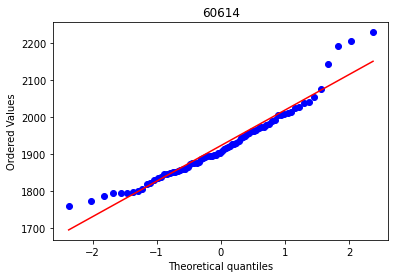

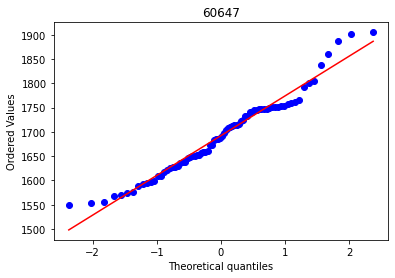

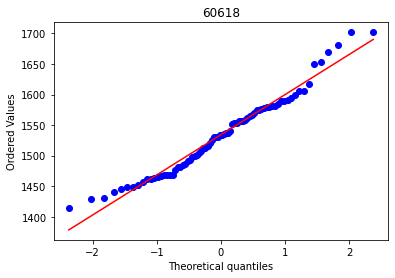

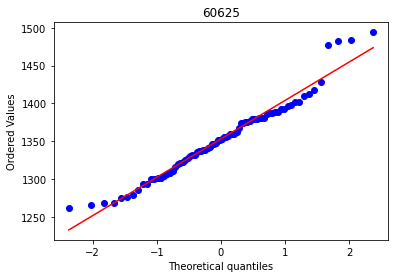

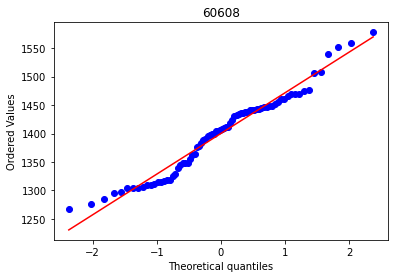

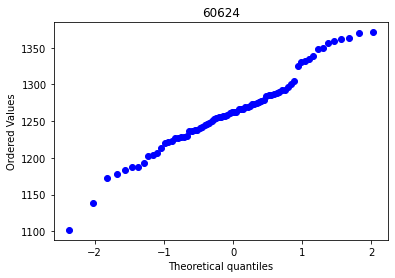

In [21]:
# If you're going to use anova, it's really important to assess and ensure your data is normalized
# We can use a for loop to check each zip code.
for col in transposed_df.columns:
    stats.probplot(transposed_df[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()

In [22]:
# Melt allows us to make our columns into column values (See the zip_code column)
anova_ready = pd.melt(transposed_df.copy().reset_index(), id_vars=['index'], value_vars=transposed_df.columns)
anova_ready.columns = ['date', 'zip_code', 'rent']
# One of our rent values is null, so we need to drop it to prevent later errors
anova_ready.dropna(how="any", inplace=True)
print(anova_ready.info())
anova_ready


<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 467
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      467 non-null    datetime64[ns]
 1   zip_code  467 non-null    object        
 2   rent      467 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 14.6+ KB
None


,date,zip_code,rent
0,2016-01-01,60614,1773.0
1,2016-02-01,60614,1796.0
2,2016-03-01,60614,1805.0
3,2016-04-01,60614,1820.0
4,2016-05-01,60614,1854.0
...,...,...,...
463,2022-02-01,60624,1338.0
464,2022-03-01,60624,1363.0
465,2022-04-01,60624,1371.0
466,2022-05-01,60624,1370.0


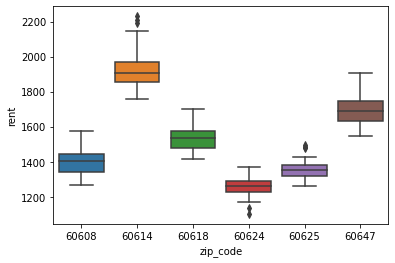

In [23]:
import seaborn as sns

# Basically just checking the distribution again. There's a scew for some of these
# which is important to know
ax = sns.boxplot(x='zip_code', y='rent', data=anova_ready)
plt.show()

In [24]:
# checking our f and p values
clean_df = transposed_df.dropna(how="any") #Once again, removing that single nan
f_val, p_val = stats.f_oneway(clean_df[60608], clean_df[60614], clean_df[60618], clean_df[60624], 
                              clean_df[60625], clean_df[60647])

# p is less than .05, so it's significant (we can use the f value)
print(f"F VALUE: {f_val}     P VALUE: {p_val} ")

F VALUE: 902.2453404766235     P VALUE: 7.662703860872899e-234 


In [25]:
# p value is lower than .05 so we can use this
# there's a difference between the zip codes, but we can't tell which specific one

# The reason we're not looking at date is that in time series date is basically a sequence where
# the value doesn't really matter (other than the fact that x is before y); basically it's an index.
rent_lm = ols('rent ~ C(zip_code)', data=anova_ready).fit()
table = sm.stats.anova_lm(rent_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
C(zip_code),2.332547e+07,5.0,902.860381,1.686628e-235
Residual,2.381994e+06,461.0,NaN,NaN
